In [2]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt

/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

### Distribution of each topic stance for each month

In [ ]:
def plot_c_subplot(df, color_topics, month, n_bins = 15, num_plots = 3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        axes[i].hist(df[topic], bins = n_bins)
 
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')

        axes[i].set_title(f'Distribution of {topic} in {month}')
 
    plt.tight_layout()
    plt.show()

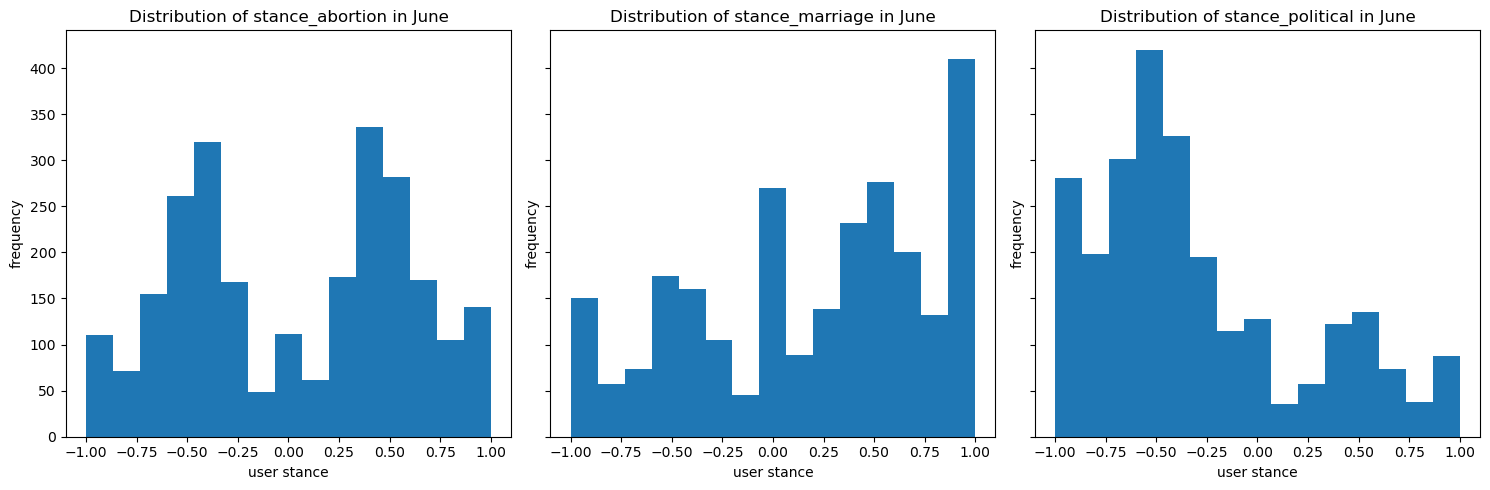

In [5]:
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")

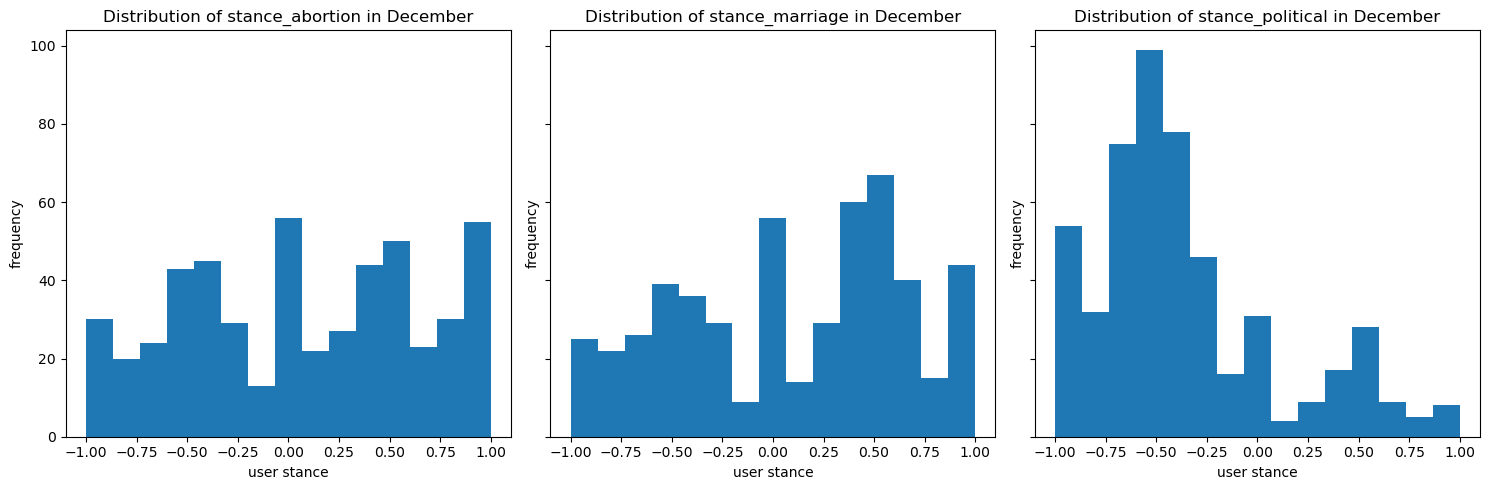

In [6]:
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")

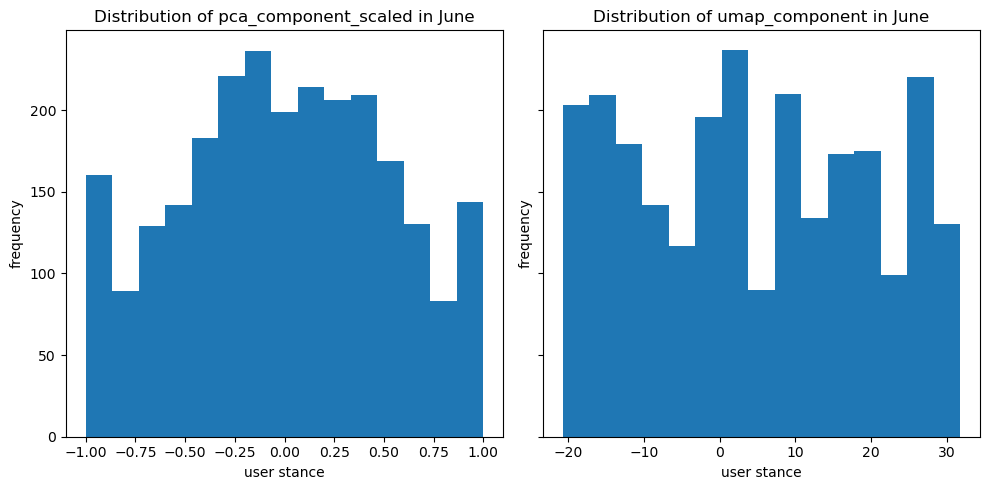

In [7]:
plot_c_subplot(june_df, ["pca_component_scaled", "umap_component"], month = "June", num_plots=2)

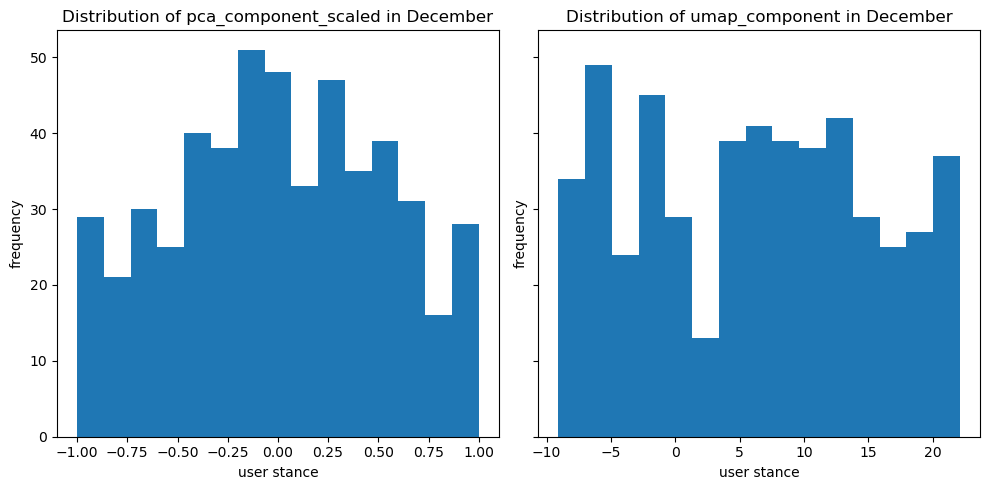

In [8]:
plot_c_subplot(dec_df, ["pca_component_scaled", "umap_component"], month = "December", num_plots=2)

### Same plots, but colored by stance score

Number of bins was set to 30!!

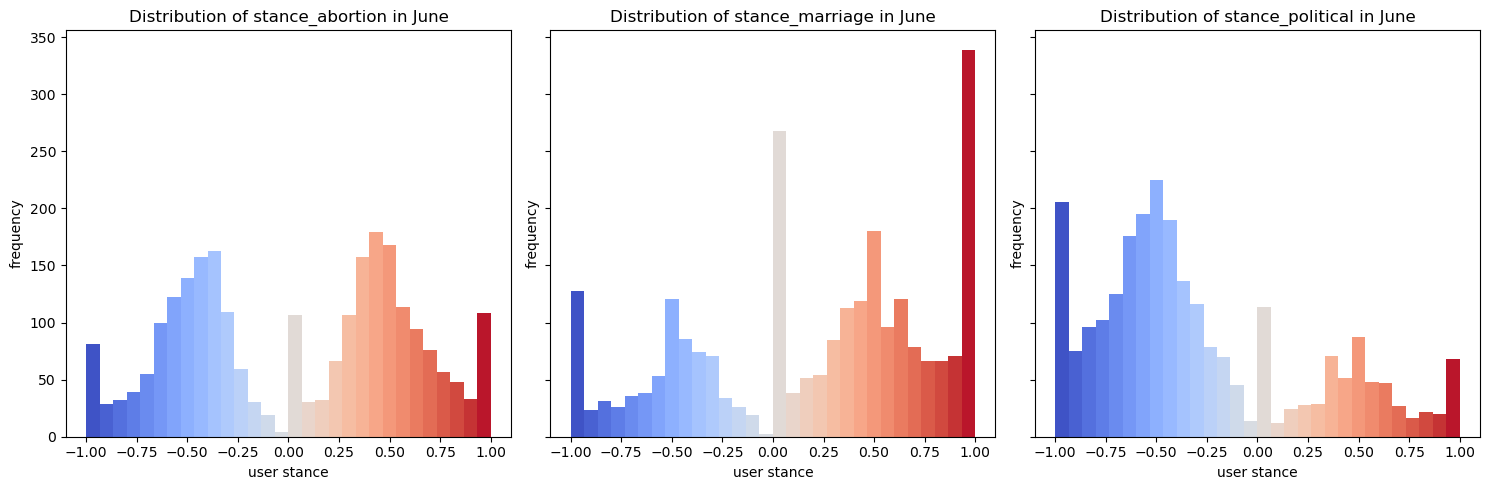

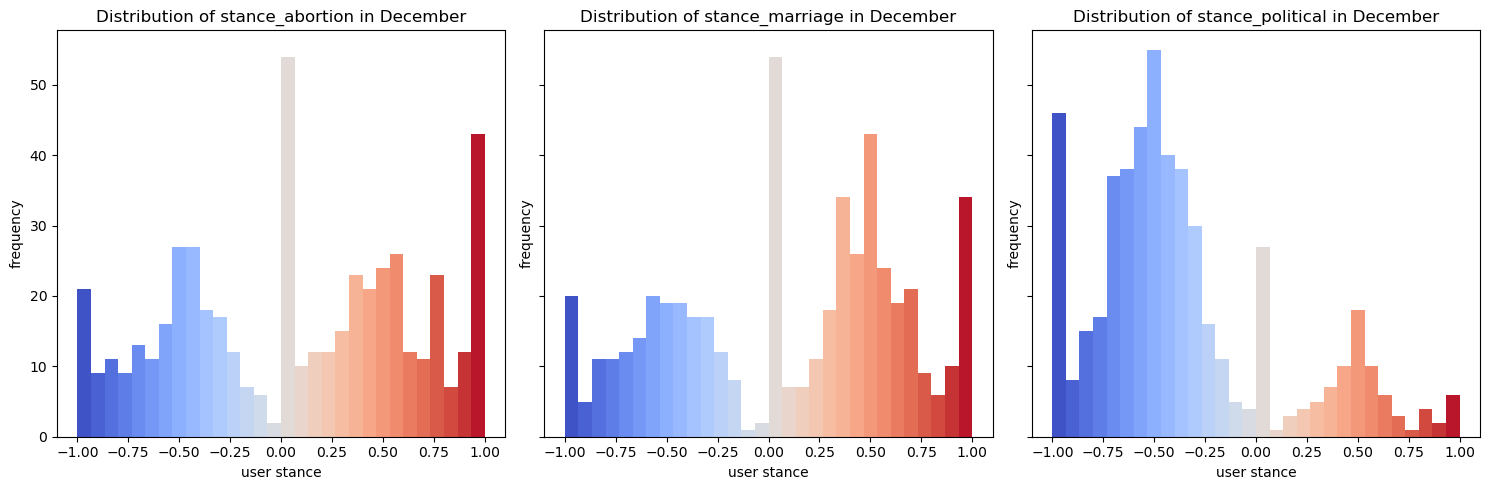

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_c_subplot(df, color_topics, month, n_bins=30, num_plots=3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        
        # Calculate the histogram values
        n, bins, patches = axes[i].hist(df[topic], bins=n_bins, range=(-1, 1))

        # Normalize the values to the range [-1, 1]
        norm = plt.Normalize(vmin=-1, vmax=1)

        # Create a colormap (from blue to red)
        cmap = plt.get_cmap('coolwarm')

        # Color each bar based on its value
        for patch, bin_edge in zip(patches, bins[:-1]):  # Iterate through bins
            # Calculate the midpoint of the bin (this will determine the color)
            bin_center = (bin_edge + bins[np.where(bins == bin_edge)[0][0] + 1]) / 2
            color = cmap(norm(bin_center))  # Normalize and apply the colormap
            patch.set_facecolor(color)  # Set color of the bar

        # Set labels and titles
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')
        axes[i].set_title(f'Distribution of {topic} in {month}')
    
    plt.tight_layout()
    plt.show()
    
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")


### Networks colored by scaled principal component  

In [9]:
june_df.columns

Index(['Unnamed: 0', 'user', 'A_x', 'F_x', 'N_x', 'stance_abortion', 'A_y',
       'F_y', 'N_y', 'stance_marriage', 'A', 'F', 'N', 'stance_political',
       'stance_political_scaled', 'stance_abortion_scaled',
       'stance_marriage_scaled', 'pca_component', 'umap_component', 'nodeid',
       'pca_component_scaled', 'pca_component1', 'pca_component2',
       'umap_component1', 'umap_component2', 'pca1_scaled', 'pca2_scaled'],
      dtype='object')

In [10]:
attr_dict_june = june_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled"]].to_dict(orient='index')
attr_dict_dec = dec_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled"]].to_dict(orient='index')

In [11]:
# june_dict = june_df.set_index('nodeid')['pca_component_scaled'].to_dict()
# dec_dict  = dec_df.set_index('nodeid')['pca_component_scaled'].to_dict()

In [12]:
net_file = pd.read_csv("../output_network/network_filtered_june.csv", sep="\t")
G_june = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_june)

Graph with 2514 nodes and 23700 edges


In [13]:
net_file = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G_dec = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_dec)

Graph with 511 nodes and 2785 edges


In [14]:
# setting the attributes 
nx.set_node_attributes(G_june, attr_dict_june)
nx.set_node_attributes(G_dec, attr_dict_dec)
print(G_june.nodes[911729]['pca_component_scaled'])
print(G_dec.nodes[1232857]['pca_component_scaled'])

-0.3719542900291201
0.053076728245611


In [15]:
# checks 
print(june_df[june_df["nodeid"] == 911729]["pca_component_scaled"])
print(dec_df[dec_df["nodeid"] == 1232857]["pca_component_scaled"])

0   -0.371954
Name: pca_component_scaled, dtype: float64
0    0.053077
Name: pca_component_scaled, dtype: float64


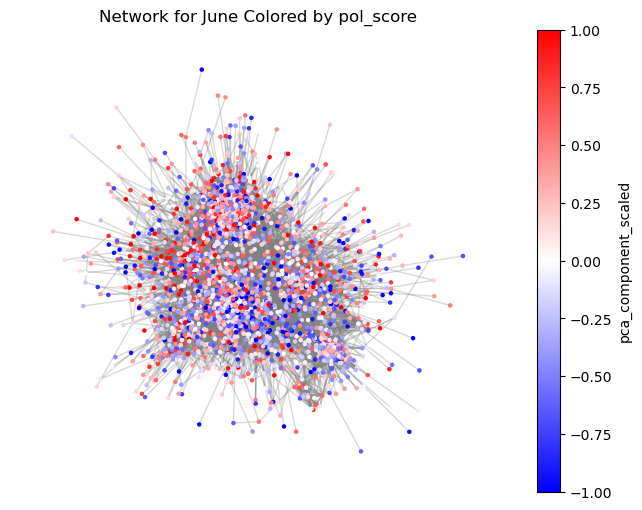

In [ ]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_june.nodes[n].get("pca_component_scaled", 0) for n in G_june.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_june, seed=42)  # Or any other layout
nx.draw(
    G_june, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap (seismic, bwr, coolwarm)
    edge_color=(0.5, 0.5, 0.5, 0.3), 
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for June Colored by pol_score")
plt.show()

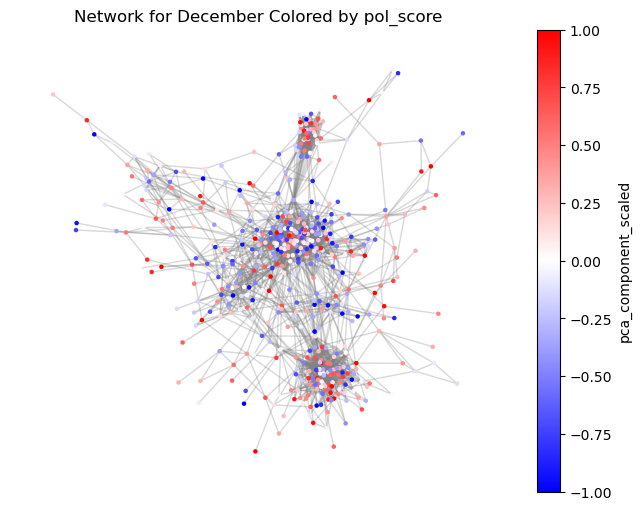

In [50]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_dec.nodes[n].get("pca_component_scaled", 0) for n in G_dec.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_dec, seed=42)  # Or any other layout
nx.draw(
    G_dec, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap
    edge_color=(0.5, 0.5, 0.5, 0.3), #sets edge color to gray by first 3 numbers (RGB) and the 4th number is the opacity from 0 (transparent) to 1 (opaque)
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for December Colored by pol_score")
plt.show()

In [18]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_june, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_june, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_june, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_june, "stance_political", nodes=None), "\n")

Homophily pca: -0.0005867298433456265 

Homophily abortion -0.0006921594058191086 

Homophily marriage 0.0012592533664777291 

Homophily political -0.0009505493654566606 



In [19]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_dec, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_dec, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_dec, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_dec, "stance_political", nodes=None), "\n")

Homophily pca: -0.004074110584887919 

Homophily abortion 0.003352604252867144 

Homophily marriage -0.0037899652115279585 

Homophily political -0.003494531298083399 



## Network analysis

- number of nodes, edges
- average degree
- max, min degree
- degree distributions??
- clustering coefficient

In [23]:
print(f"June {G_june} \n December {G_dec}")

June Graph with 2514 nodes and 23700 edges 
 December Graph with 511 nodes and 2785 edges


In [24]:
#Average degree
avg_degreeJ = sum(dict(G_june.degree()).values()) / G_june.number_of_nodes()
avg_degreeD = sum(dict(G_dec.degree()).values()) / G_dec.number_of_nodes()

print("Average degree June:", avg_degreeJ)
print("Average degree December:", avg_degreeD)

Average degree June: 18.85441527446301
Average degree December: 10.900195694716242


In [25]:
#Max and min degrees
print(f"Max degree June: {max(dict(G_june.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")
print(f"Max degree Dec: {max(dict(G_dec.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")

Max degree June: 161, Min degree: 1
Max degree Dec: 50, Min degree: 1


In [35]:
#Betweenness centrality
print("Betweenness centrality June: ", np.mean(list(nx.betweenness_centrality(G_june).values())))
print("Betweenness centrality December: ", np.mean(list(nx.betweenness_centrality(G_dec).values())))

Betweenness centrality June:  0.0010281598192880695
Betweenness centrality December:  0.005314537473627124


In [28]:
print(f"Average clustering for June graph: {nx.average_clustering(G_june)}")
print(f"Average clustering for December graph: {nx.average_clustering(G_dec)}")

Average clustering for June graph: 0.14912865628041622
Average clustering for December graph: 0.24321261067025826
